# 基础知识准备
## 使用字典进行词频统计

In [2]:
s="We tend to imagine that lightning looks like the zigzag you find in the emoji. It’s rarely that simple"
dic={}
for word in s.split():
    if word not in dic:
        dic[word]=1
    else:
        dic[word]+=1
print(dic)

{'We': 1, 'tend': 1, 'to': 1, 'imagine': 1, 'that': 2, 'lightning': 1, 'looks': 1, 'like': 1, 'the': 2, 'zigzag': 1, 'you': 1, 'find': 1, 'in': 1, 'emoji.': 1, 'It’s': 1, 'rarely': 1, 'simple': 1}


## 使用集合求交集并集
因为集合中的值是不可以重复的，所以可以查看两个句子的词语相似性

In [3]:
st_1="dogs chase cats"
st_2="dogs hate cats"
st1_word=set(st_1.split())
st2_word=set(st_2.split())

In [4]:
st1_word.intersection(st2_word)#交集

{'cats', 'dogs'}

In [5]:
st1_word.union(st2_word)#并集

{'cats', 'chase', 'dogs', 'hate'}

In [6]:
st1_word.difference(st2_word)# 差集

{'chase'}

In [7]:
jaccab=len(st1_word.intersection(st2_word))/len(st1_word.union(st2_word))#计算jaccab相似度

In [8]:
jaccab

0.5

## 使用装饰器简化步骤
装饰器的实质是在对某个函数的功能进行辅助添加。添加装饰器时，需要将主函数在装饰器的调用并返回， 装饰器函数需要返回调用主函数的方法

In [14]:
from string import punctuation
def pipeline_wrapper(func):
    def to_lower(x):
        return x.lower()
    def punc(x):
        for p in punctuation:
            x.replace(p,'')
        return x
    def wrapper(*arg,**kargs):
        x=to_lower(*arg,**kargs)
        x=punc(x)
        return func(x)
    return wrapper
@pipeline_wrapper
def tokenize_whitespace(intext):
    return intext.split()
s="string. With. Punctation "
tokenize_whitespace(s)

['string.', 'with.', 'punctation']

## 使用映射函数——map
使用映射函数map()，可以迭代进行函数的参数设定，避免代码过多。map之后产生的是一个迭代器，第一次遍历会返回所有值，所有不要重复遍历，不要回返回空值，最好在第一次遍历之后将返回值赋给变量

In [32]:
a=[10,20,30,10,30,60,100]
b=map(lambda x:x**2,a)

In [33]:
list(b)

[100, 400, 900, 100, 900, 3600, 10000]

In [34]:
list(b)

[]

## zip和izip—对集合进行合并
使用zip和izip可以对长度相同的集合合并成对。其返回的也是一个迭代对象，可以使用__next__()方法迭代取值，也可以直接转换成list类型一次性取出

In [35]:
a=range(0,5)
b=range(5,10)

In [50]:
b=zip(a,b)

In [51]:
b.__next__()

(0, 5)

In [52]:
b.__next__()

(1, 6)

In [53]:
b.__next__()

(2, 7)

In [56]:
for item in b:
    print(item)

(3, 8)
(4, 9)


# 数据读取与预处理
## 数据读取
numpy中提供了一个genfromtext()方法可以从表格数据中创建数组。pandas中也提供了read函数。

In [65]:
import numpy as np 
from io import StringIO
indata=StringIO("10,20,30\n56,89,90\n33,46,89")

In [66]:
data=np.genfromtxt(indata,delimiter=",",dtype=int)

In [67]:
data

array([[10, 20, 30],
       [56, 89, 90],
       [33, 46, 89]])

## 数据预处理

In [80]:
indata=StringIO("30kg,inr2000,31.11,56.33,1\n52kg,inr8000.35,12,16.7,2")

In [77]:
indata

In [78]:
np.genfromtxt(indata,delimiter=",")

array([[  nan,   nan, 31.11, 56.33,  1.  ],
       [  nan,   nan, 12.  , 16.7 ,  2.  ]])

In [ ]:
indata=StringIO("30kg,inr2000,31.11,56.33,1\n52kg,inr8000.35,12,16.7,2").encoding("latinl")
strip1=lambda x : float(x.rstrip("kg"))
strip2=lambda x : float(x.lstrip("inr"))
convert_dict={0:strip1,1:strip2}
data=np.genfromtxt(indata,delimiter=',',converters=convert_dict)

# Numpy,matplotlib与scikit-learn
## numpy
### 创建对角阵

In [101]:
np.eye(3,3,)

array([[0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [102]:
np.eye(4,4,3)

array([[0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

## matplotlib
### 绘制带颜色的散点图

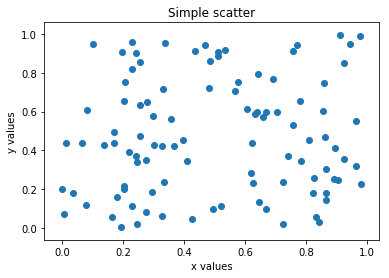

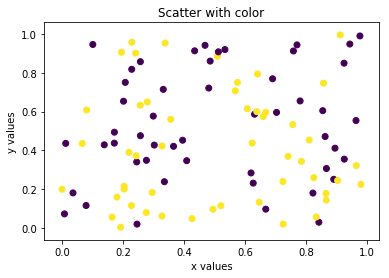

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
def simple_scatter(x,y,figure_no):
    plt.figure(figure_no)
    plt.scatter(x,y)
    plt.xlabel('x values')
    plt.ylabel('y values')
    plt.title('Simple scatter')
    

def scatter_with_color(x,y,labels,figure_no):
    plt.figure(figure_no)
    plt.scatter(x,y,c=labels)
    plt.xlabel('x values')
    plt.ylabel('y values')
    plt.title('Scatter with color')
figure_no=1
x = np.random.uniform(size=100)
y = np.random.uniform(size=100)
figure_no+=1
simple_scatter(x,y,figure_no)
figure_no+=1
label = np.random.randint(2,size=100)
scatter_with_color(x,y,label,figure_no)
plt.show()

### 绘制热力图

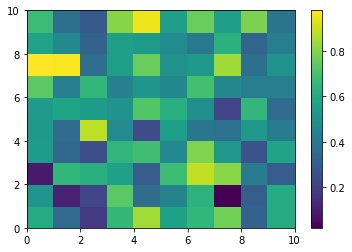

In [120]:
def plot_heat_map(x,figure_no):
    plt.figure(figure_no)
    plt.pcolor(x) #绘制热力图
    plt.colorbar() #显示图例
x = np.random.normal(loc=0.5,scale=0.2,size=(10,10))
plot_heat_map(x,2)
plt.show()


## scikit-learn-机器学习
### 加载预设数据集

In [143]:
from sklearn.datasets import load_iris,load_boston,make_classification,make_circles

In [128]:
data=load_iris()
x=data["data"]
y=data['target']
x_label=data['feature_names']
y_label=data['target_names']

In [130]:
x_label

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [131]:
x.shape

(150, 4)

In [132]:
y_label

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [133]:
y.shape

(150,)

In [134]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 产生随机分类数据集

In [138]:
x,y=make_classification(n_samples=100,n_features=10,n_classes=2)#生成一个具有10个特征，2个类别的数据集

In [139]:
x.shape

(100, 10)

In [140]:
y.shape

(100,)

### 产生非线性数据集

In [159]:
x,y=make_circles()

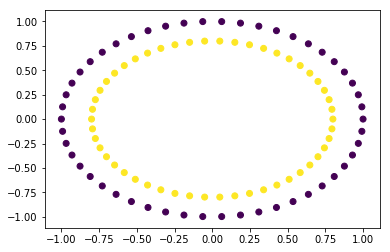

In [160]:
plt.scatter(x[:,0],x[:,1],c=y)

In [156]:
from sklearn.datasets import make_moons

In [161]:
x,y=make_moons()

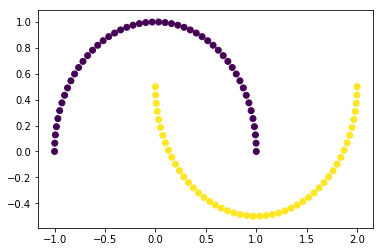

In [162]:
plt.scatter(x[:,0],x[:,1],c=y)

### 计算与转换（fit and transform）

In [163]:
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier()

In [170]:
data=load_iris()
x=data["data"]
y=data['target']
x_label=data['feature_names']
y_label=data['target_names']
estimator.fit(x,y)
predicted_y=estimator.predict(x)
predicted_y_prob=estimator.predict_proba(x)

# 数据分析——探索与争鸣
## 用图表分析单变量数据
1.使用匿名函数预处理数据中的异常值

In [172]:
import numpy as np
import matplotlib.pyplot as plt

fill_data=lambda x : int(x.strip() or 0)
data=np.genfromtxt("president.txt",dtype=(int,int),converters={1:fill_data},delimiter=",")

2.画出图形查看特征

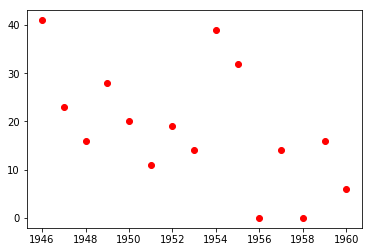

In [175]:
x=data[:,0]
y=data[:,1]
plt.plot(x,y,"ro")

3.计算百分位数，并将其加入到图形中查看特征和趋势，并查看异常值

```
所谓异常值就是一个点明显落在绝大多数模式分布范围之外的点
```

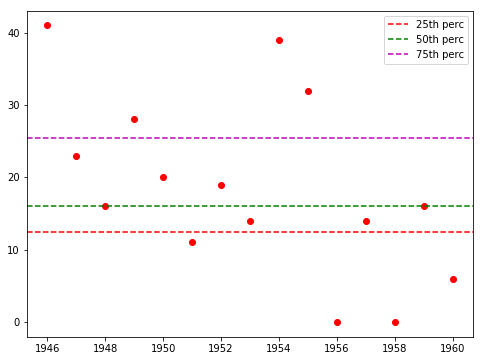

In [200]:
perc_25 = np.percentile(y,25)
perc_50 = np.percentile(y,50)
perc_75 = np.percentile(y,75)
plt.figure(figsize=(8,6))
plt.plot(x,y,"ro")
plt.axhline(perc_25,label='25th perc',c='r',ls="dashed")
plt.axhline(perc_50,label='50th perc',c='g',ls="dashed")
plt.axhline(perc_75,label='75th perc',c='m',ls="--")
plt.legend(loc='best')
plt.show()

4.隐藏异常值，重新画图

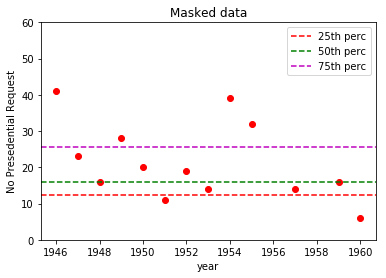

In [203]:
y_masked=np.ma.masked_where(y==0,y)
plt.title("Masked data")
plt.plot(x,y_masked,'ro')
plt.xlabel('year')
plt.ylabel('No Presedential Request')
plt.ylim(0,60)
plt.axhline(perc_25,label='25th perc',c='r',ls="dashed")
plt.axhline(perc_50,label='50th perc',c='g',ls="dashed")
plt.axhline(perc_75,label='75th perc',c='m',ls="--")
plt.legend(loc='best')

## 数据分组与使用点阵图
为了更好地掌握数据，我们得使用EDA方法从多个角度对数据进行或深或浅的观察，换个思路，我们可以使用点阵图，所谓点阵图，就是将数据分成多个组绘制在一定范围内，我们所需要做的决定就是如何分组。**点阵图更适合小数据，大数据更适用直方图**

1.加载相应的包

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from collections import OrderedDict
from matplotlib.pylab import frange

2.装在数据，并处理丢失的数据

In [11]:
fill_data=lambda x : int(x.strip() or 0)
data=np.genfromtxt("president.txt",dtype=(int,int),converters={1:fill_data},delimiter=",")
x=data[:,0]
y=data[:,1]

3.采用频率对数据进行分组

In [12]:
x_freq=Counter(y)
x_=np.array(list(x_freq.keys()))
y_=np.array(list(x_freq.values()))

适用年份进行分组

In [13]:
x_group = OrderedDict()
group= 5
group_count=1
keys = []
values = []
for i,xx in enumerate(x):
    # Individual data point is appended to list keys
    keys.append(xx)
    values.append(y[i])
    # If we have processed five data points (i.e. five years)
    if group_count == group:
        # Convert the list of keys to a tuple
        # use the new tuple as the ke to x_group dictionary
        x_group[tuple(keys)] = values
        keys= []
        values =[]
        group_count = 1
        
    group_count+=1
# Accomodate the last batch of keys and values
x_group[tuple(keys)] = values 

In [14]:
x_group

OrderedDict([((1946, 1947, 1948, 1949, 1950), [41, 23, 16, 28, 20]),
             ((1951, 1952, 1953, 1954), [11, 19, 14, 39]),
             ((1955, 1956, 1957, 1958), [32, 0, 14, 0]),
             ((1959, 1960), [16, 6])])

4.绘制点阵图

(0, 3)

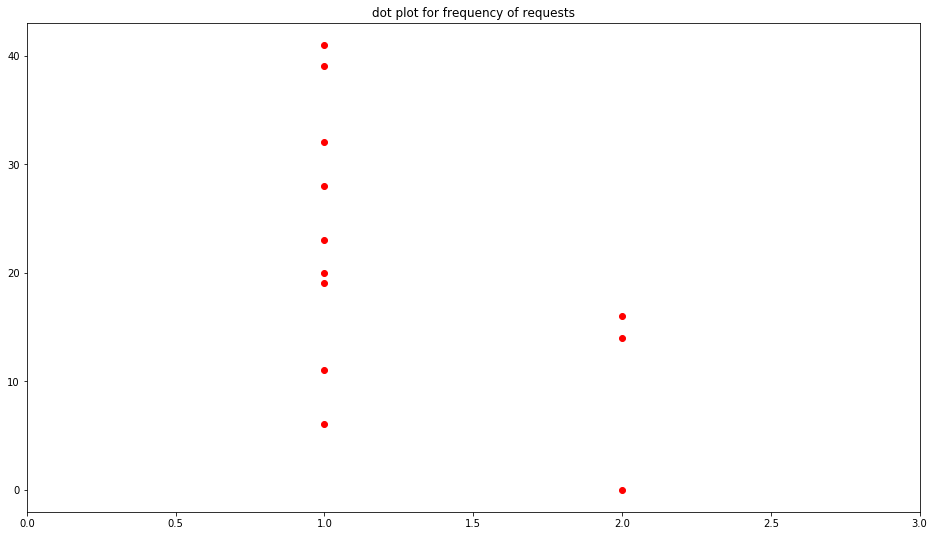

In [15]:
plt.figure(figsize=(16,9))
plt.plot(y_,x_,'ro')
plt.title('dot plot for frequency of requests')
plt.xlim(min(y_)-1,max(y_)+1)

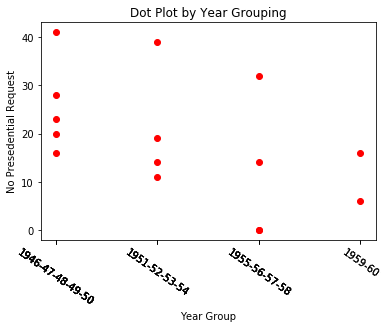

In [16]:
x_vals =[]
x_labels =[]
y_vals =[]
x_tick = 1
for k,v in x_group.items():
    for i in range(len(k)):
        x_vals.append(x_tick)
        x_label = '-'.join([str(kk) if not i else str(kk)[-2:] for i,kk in enumerate(k)])
        x_labels.append(x_label)
    y_vals.extend(list(v))
    x_tick+=1

plt.title("Dot Plot by Year Grouping")
plt.xlabel('Year Group')
plt.ylabel('No Presedential Request')
try:
    plt.plot(x_vals,y_vals,'ro')
except ValueError:
    print(len(x_vals),len(y_vals))
    
plt.xticks(x_vals,x_labels,rotation=-35)

plt.show()

## 为多变量数据绘制散点阵图
在对变量数据进行分析时，我们更感兴趣的是这些列之间是否存在某些联系。对于两个列/变量的情形，从标准准散点图开始是最合适的，它们之间只有以下四种关系：
- 无关联
- 强关联
- 简单关联
- 多元关联

1.加载常用包


In [2]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import itertools

2.载入数据，并绘图

In [28]:
data=load_iris()
x=data['data']
y=data['target']
col_name=data['feature_names']

subplots=321
col_number=range(0,4)

col_pairs=itertools.combinations(col_number,2)#这个方法表示将0,1，2,3四个数两两组合，并形成迭代对象

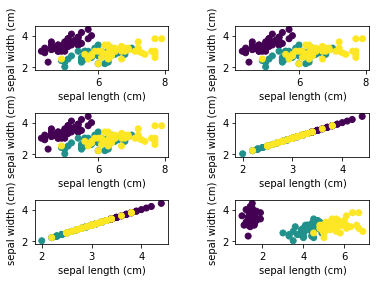

In [29]:
%matplotlib inline
plt.subplots_adjust(wspace=0.5,hspace=1)
for colpair in col_pairs:
    plt.subplot(subplots)
    plt.scatter(x[:,colpair[0]],x[:,col_pair[1]],c=y)
    plt.xlabel(col_name[col_pair[0]])
    plt.ylabel(col_name[col_pair[1]])
    subplots+=1
plt.show()


## 使用热图
热图是另一种有趣的可视化技术。在热图汇总数据的形式是矩阵，数据的属性值范围用颜色渐变来表示。

1.加载库和数据

In [39]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
import numpy as np
import matplotlib.pyplot as plt
data = load_iris()
x = data['data']
y = data['target']
col_names = data['feature_names']

2.缩放数据

In [40]:
x=scale(x,with_std=False)#将数据进行缩放，使其更接近均值
x_=x[1:26,]
y_labels=range(1,26)

3.绘制热力图

[Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5'),
 Text(0,0,'6'),
 Text(0,0,'7'),
 Text(0,0,'8'),
 Text(0,0,'9'),
 Text(0,0,'10'),
 Text(0,0,'11'),
 Text(0,0,'12'),
 Text(0,0,'13'),
 Text(0,0,'14'),
 Text(0,0,'15'),
 Text(0,0,'16'),
 Text(0,0,'17'),
 Text(0,0,'18'),
 Text(0,0,'19'),
 Text(0,0,'20'),
 Text(0,0,'21'),
 Text(0,0,'22'),
 Text(0,0,'23'),
 Text(0,0,'24'),
 Text(0,0,'25')]

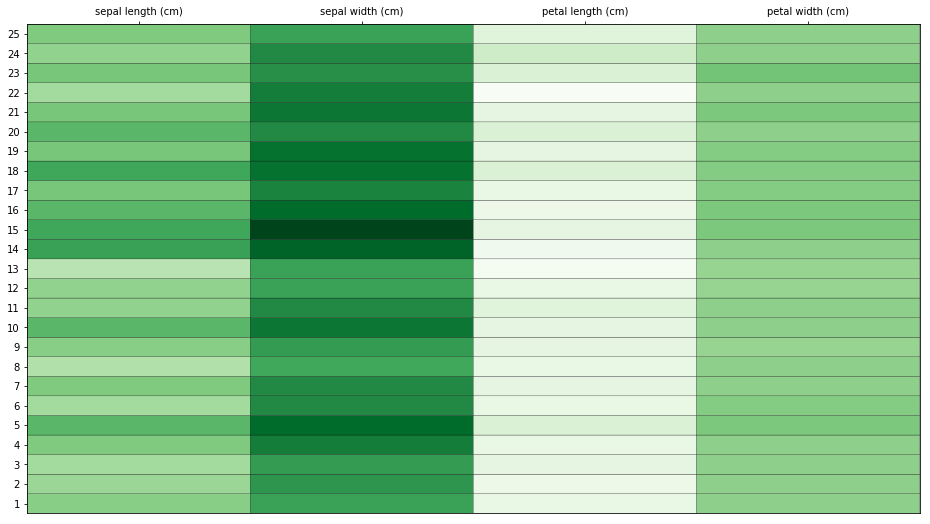

In [46]:
fig,ax = plt.subplots(figsize=(16,9))
ax.pcolor(x_,cmap=plt.cm.Greens,edgecolors='k')
ax.set_xticks(np.arange(0,x_.shape[1])+0.5)#设置刻度
ax.set_yticks(np.arange(0,x_.shape[0])+0.5)
ax.xaxis.tick_top()#设置坐标位置
ax.yaxis.tick_left()
ax.set_xticklabels(col_names,minor=False,fontsize=10)#设置标签
ax.set_yticklabels(y_labels,minor=False,fontsize=10)


另一种热图的画法——通过变量将各自的类区分开来

<Figure size 432x288 with 0 Axes>

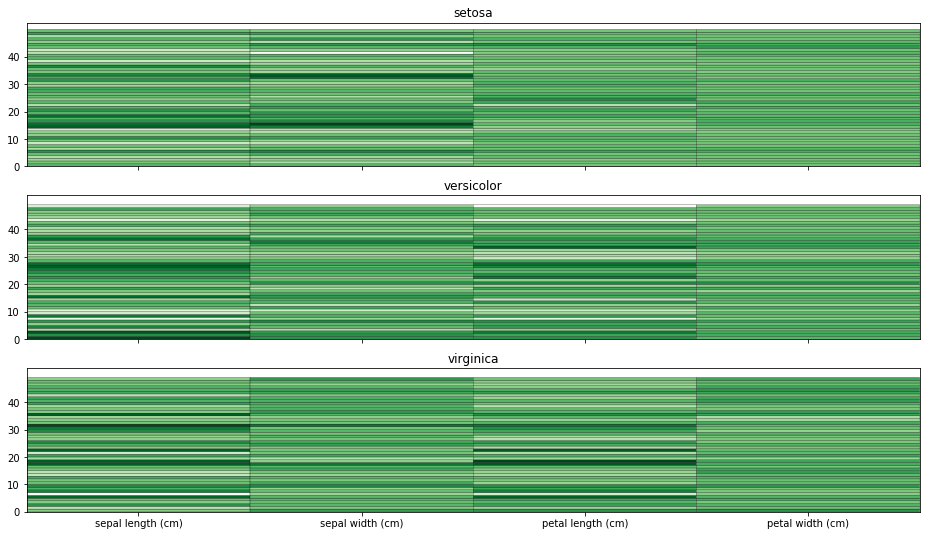

In [49]:
x1 = x[0:50]
x2 = x[50:99]
x3 = x[100:149]
x1 = scale(x1,with_std=False)
x2 = scale(x2,with_std=False)
x3 = scale(x3,with_std=False)
plt.close('all')
plt.figure(2)
fig,(ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True,figsize=(16,9))
y_labels = range(1,51)
ax1.set_xticks(np.arange(0,x.shape[1])+0.5)
ax1.set_yticks(np.arange(0,50,10))
ax1.xaxis.tick_bottom()
ax1.set_xticklabels(col_names,minor=False,fontsize=2)
ax1.pcolor(x1,cmap=plt.cm.Greens,edgecolors='k')
ax1.set_title(data['target_names'][0])
ax2.pcolor(x2,cmap=plt.cm.Greens,edgecolors='k')
ax2.set_title(data['target_names'][1])
ax3.pcolor(x3,cmap=plt.cm.Greens,edgecolors='k')
ax3.set_title(data['target_names'][2])
plt.show()   

## 概要统计及绘图

概要统计的主要目的是为了能拿个更好的理解数据的位置和分布， 我们关注的是平均值，中位数，标准差等，这些数都很容易计算。不过如果数据不是单峰而是多峰分布的，这些数据就没那么好用了。

In [2]:
#加载库
from sklearn.datasets import  load_iris
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import trim_mean#计算截尾均值

##加载数据
data=load_iris()
x=data['data']
y=data['target']
col_names=data['feature_names']

# 计算平均值，截尾均值和幅度值
print("col name,mean vaule")
for i,col_name in enumerate(col_names):
    print ("%s,%0.2f" %(col_name,np.mean(x[:,i])))

col name,mean vaule
sepal length (cm),5.84
sepal width (cm),3.05
petal length (cm),3.76
petal width (cm),1.20


In [3]:
#计算截尾均值
p=0.1
print("col_name,trim_mean value")
for i,col_name in enumerate(col_names):
    print("%s,%0.2f" %(col_name,trim_mean(x[:,i],p)))

col_name,trim_mean value
sepal length (cm),5.81
sepal width (cm),3.04
petal length (cm),3.76
petal width (cm),1.18


In [7]:
#数据离差，计算并显示幅度值
print("col_name,max min range")
for i,col_nmae in enumerate(col_names):
    print("%s,%0.2f,%0.2f,%0.2f" %(col_name,max(x[:,i]),min(x[:,i]),max(x[:,i])-min(x[:,i])))

col_name,max min range
petal width (cm),7.90,4.30,3.60
petal width (cm),4.40,2.00,2.40
petal width (cm),6.90,1.00,5.90
petal width (cm),2.50,0.10,2.40


In [8]:
#计算数据离差，方差和标准差
print("col_name,variance,std_dev")
for i,col_name in enumerate(col_names):
    print("%s,%0.2f,%0.2f" %(col_name,np.mean(x[:,i]),np.std(x[:,i])))

col_name,variance,std_dev
sepal length (cm),5.84,0.83
sepal width (cm),3.05,0.43
petal length (cm),3.76,1.76
petal width (cm),1.20,0.76


In [10]:
#计算平均绝对离差
def mad(x,axis=None):
    mean=np.mean(x,axis=axis)
    return np.sum(np.abs(x-mean))/(1.0*len(x))
print("col_name,mad")
for i, col_name in enumerate(col_names):
    print("%s,%0.2f" %(col_name,mad(x[:,i])))

col_name,mad
sepal length (cm),0.69
sepal width (cm),0.33
petal length (cm),1.56
petal width (cm),0.66


In [11]:
#计算绝对中位差
def mdad(x,axis=None):
    median=np.median(x,axis=None)
    return np.median(np.abs(x-median))
print("col_name,mdad")
for i,col_name in enumerate(col_names):
    print("%s,%0.2f" %(col_name,mdad(x[:,i])))

col_name,mdad
sepal length (cm),0.70
sepal width (cm),0.25
petal length (cm),1.25
petal width (cm),0.70


## 使用箱线图
在概要统计中，箱线图是一种好用的查看统计信息的工具，它能够高效的表达出数据的千分位数，如果数据中有异常点，它能够通过展示数据的总体结构而将其显现出来。箱线图必须具有以下特点：
- 标出水平的中位线
- 箱体扩展到四分位范围，用来衡量数据的分布
- 一系列的虚线从中间的箱体或横或纵伸展，便是数据的尾部分布

([<matplotlib.axis.XTick at 0x1750a6df2e8>,
 <a list of 4 Text xticklabel objects>)

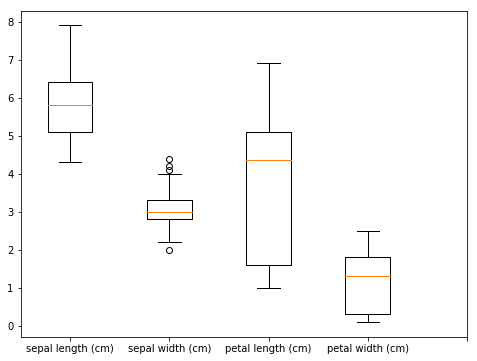

In [19]:
# 加载库
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 加载数据
data=load_iris()
x=data['data']
y=data['target']
col_names=data['feature_names']

#绘图
plt.figure(figsize=(8,6))
plt.boxplot(x)
plt.xticks(range(1,6),col_names)

**根据不同类别画箱线图**

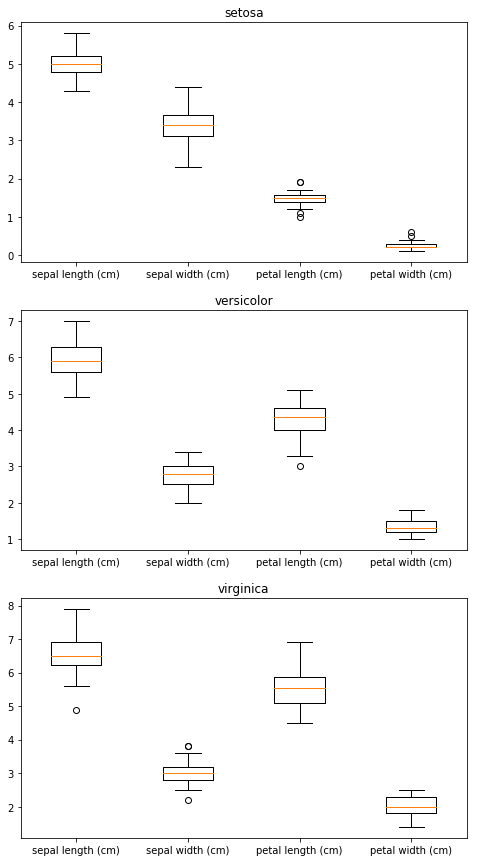

In [25]:
y_label=data['target_names']
fig=plt.figure(figsize=(8,15))
subcounts=311
plt.subplots_adjust(wspace=0.5)#调整图像距离
for i in range(0,3):
    ax=fig.add_subplot(subcounts)
    y_index=np.where(y==i)[0]
    ax.boxplot(x[y_index,:])
    ax.set_title(y_label[i])
    ax.set_xticklabels(col_names)
    subcounts+=1

## 修补数据
常见的修补技术的方法：
- 有类别标签的情况：
    - 结合类别标签进行处理
- 无类别标签
    - 一种简单的技术就是直接忽略丢失的数据，从而避免修正数据的高昂代价，不过这只能针对数据量非常丰富的情况下
    - 一种更好的处理丢失数据的方法是对它进行拟合。当前的拟合过程可以针对数据本身，也可以结合类别标签进行。对于变量值是连续值的情形，平均值，中位数或者最为常见的数值都是可以用来被替代丢失的数据。Scikit-learn在preprocessing模块中提供了Imputer()函数来处理丢失的数据

In [26]:
# 加载库
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
from sklearn.preprocessing import Imputer

# 加载数据
data=load_iris()
x=data['data']
y=data['target']
col_names=data['feature_names']

#复制原始数据
x_c=x.copy()

#制造丢失值
x_c[2,:]=np.repeat(0,x.shape[1])

In [27]:
#进行数据修补，采用平均值策略，在丢失的数据位置上，用列的平均值来填充
imputer=Imputer(missing_values=0,strategy='mean')
x_imputered=imputer.fit_transform(x_c)

## 采用随机抽样
通常情况下，如果对整个数据集进行处理需要付出高昂的代价，那么应该对数据进行采样，只提取整体的一部分值来进行分析

In [32]:
# 加载库
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

# 加载数据
data=load_iris()
x=data['data']
y=data['target']
col_names=data['feature_names']

no_records=10
x_sample_index=np.random.choice(range(x.shape[0]),no_records)
x_sample=x[x_sample_index,:]
print(x_sample)

[[5.4 3.4 1.7 0.2]
 [6.1 2.8 4.  1.3]
 [6.  2.2 5.  1.5]
 [5.1 2.5 3.  1.1]
 [5.1 3.8 1.5 0.3]
 [5.  3.5 1.6 0.6]
 [5.  3.  1.6 0.2]
 [7.1 3.  5.9 2.1]
 [5.  3.5 1.6 0.6]
 [5.8 2.7 5.1 1.9]]


## 缩放数据
缩放数据是一钟非常重要的技术手段，一般来说，对数据集进行缩放后，我们能够控制数值的范围，这些数据类型能够匹配。当数据集中有多个列时，数值较大的列对于其他列更具优势，因此我们必须对数据进行缩放以避免这种干扰

In [35]:
#创建缩放数据
import numpy as np
np.random.seed(100)
x=[np.random.randint(10,25)*1.0 for i in range(10)]

#定义函数进行缩放
def min_max(x):
    return [round((xx-min(x))/(max(x)-min(x)),2) for xx in x]

x,min_max(x)

([18.0, 18.0, 13.0, 17.0, 17.0, 10.0, 20.0, 24.0, 14.0, 12.0],
 [0.57, 0.57, 0.21, 0.5, 0.5, 0.0, 0.71, 1.0, 0.29, 0.14])

**scikit-learn中的MinMaxScaler函数提供了相同的功能**

**MinMaxScaler只接受numpy的matrix对象，且运算是列运算，切忌输入行**

In [41]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

x=np.matrix(x)
##使用MinMaxScaler
minmax=MinMaxScaler(feature_range=(0,1))
minmax.fit_transform(x.T)

array([[0.57142857],
       [0.57142857],
       [0.21428571],
       [0.5       ],
       [0.5       ],
       [0.        ],
       [0.71428571],
       [1.        ],
       [0.28571429],
       [0.14285714]])

## 数据标准化
数据标准化将输入的数值转换为平均值为0，标准差为1的形式

标准化的$$X=\frac{x-mean(value)}{sd(X)}$$


In [42]:
#加载包
import numpy as np
from sklearn.preprocessing import scale

##创建数据
np.random.seed(100)
x=[np.random.randint(10,25)*1.0 for i in range(10)]

##中心化
x_centered=scale(x,with_mean=True,with_std=False)

##标准化
x_standared=scale(x,with_mean=True,with_std=True)
x_centered,x_standared

(array([ 1.7,  1.7, -3.3,  0.7,  0.7, -6.3,  3.7,  7.7, -2.3, -4.3]),
 array([ 0.43305953,  0.43305953, -0.84064497,  0.17831863,  0.17831863,
        -1.60486768,  0.94254133,  1.96150494, -0.58590407, -1.09538587]))

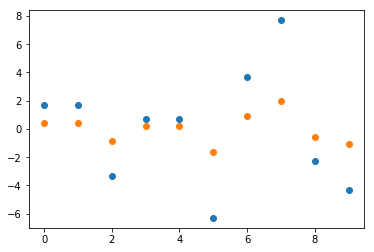

In [46]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
fig.set_figure((16,9))
ax.plot(x_centered,'o')
ax.plot(x_standared,'o')

# 文本数据
## 实施分词化
给定一些文本数据，首先要做的就是将文本进行分词化，以满足需要解决的问题的格式要求。分词化是一个比较宽泛的概念，我们可以把文本分词化为一下几个级别的粒度：
- 段落级别
- 词句级别
- 词级别

In [63]:
# 加载所需要的库
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from collections import defaultdict

## 创建一个文本

sentence = "Peter Piper picked a peck of pickled peppers. A peck of pickled \
peppers, Peter Piper picked !!! If Peter Piper picked a peck of pickled \
peppers, Wheres the peck of pickled peppers Peter Piper picked ?"

## 使用nltk分词器，将给定的文本分词成多个句子
sent_list=sent_tokenize(sentence)

## 从句子中抽取词
word_dict=defaultdict(list)
for i,sent in enumerate(sent_list):
    word_dict[i].extend(word_tokenize(sent))
print(word_dict)r', 'Piper', 'picked', 'a', 'peck', 'of

defaultdict(<class 'list'>, {0: ['Peter', 'Piper', 'picked', 'a', 'peck', 'of', 'pickled', 'peppers', '.'], 1: ['A', 'peck', 'of', 'pickled', 'peppers', ',', 'Peter', 'Piper', 'picked', '!', '!', '!'], 2: ['If', 'Peter', 'Piper', 'picked', 'a', 'peck', 'of', 'pickled', 'peppers', ',', 'Wheres', 'the', 'peck', 'of', 'pickled', 'peppers', 'Peter', 'Piper', 'picked', '?']})


## 删除停用词
在文本处理过程中，我们更关注那些能够帮助我们给特定的文本和语料中的其他文本区别出来的词和短语，他们可以被称为关键短语。
```
有时候，一些很常见的词在帮助选择文档匹配用户需求方面几乎毫无价值，他们必须从词表中彻底清除，这些词就称为停用词
```


In [81]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

text = "Text mining, also referred to as text data mining, roughly equivalent to text analytics,\
refers to the process of deriving high-quality information from text. High-quality information is \
typically derived through the devising of patterns and trends through means such as statistical \
pattern learning. Text mining usually involves the process of structuring the input text \
(usually parsing, along with the addition of some derived linguistic features and the removal \
of others, and subsequent insertion into a database), deriving patterns within the structured data, \
and finally evaluation and interpretation of the output. 'High quality' in text mining usually \
refers to some combination of relevance, novelty, and interestingness. Typical text mining tasks \
include text categorization, text clustering, concept/entity extraction, production of granular \
taxonomies, sentiment analysis, document summarization, and entity relation modeling \
(i.e., learning relations between named entities).Text analysis involves information retrieval, \
lexical analysis to study word frequency distributions, pattern recognition, tagging/annotation, \
information extraction, data mining techniques including link and association analysis, \
visualization, and predictive analytics. The overarching goal is, essentially, to turn text \
into data for analysis, via application of natural language processing (NLP) and analytical \
methods.A typical application is to scan a set of documents written in a natural language and \
either model the document set for predictive classification purposes or populate a database \
or search index with the information extracted."

## 删除停用词
words=word_tokenize(text)
stopword=stopwords.words("english")
print(len(words))
new_words=[word for word in words if word not in stopword]
print(len(new_words))

## 删除标点符号
new_words_2=[word for word in new_words if word not in string.punctuation]
print(len(new_words_2))

259
195
156


## 词提取
文本标准哈是一个完全不同的难题，我们要研究如何将词转换成它们原本的形态，这样才能在处理过程中保持一整，我们从传统的解决方法开始，包括词提取和词形还原。

python中用NLTK的stem方法来进行词提取，stem中包含了许多的函数来快速的进行词提取：
- Porter——波特词提取器，是最常用的词提取器，它的算法在词转换回他们的词根形态时不是很激进
- Lancaster——兰开斯特词提取器，是最激进的词提取器，使用前两种词提取器时，最终的词对于人类还是可读的，但是Lancaster则完全不可读，但是它的是三者中速度最快的
- Snowball——雪球词提取器，是Porter的改良版，它的所需计算时间比Porter快不少

In [84]:
from nltk import stem
input_words = ['movies','dogs','planes','flowers','flies','fries','fry','weeks',
                   'planted','running','throttle']
# Porter词提取
porter=stem.PorterStemmer()
[porter.stem(word) for word in input_words]

['movi',
 'dog',
 'plane',
 'flower',
 'fli',
 'fri',
 'fri',
 'week',
 'plant',
 'run',
 'throttl']

In [86]:
#Snowball词提取器
snowball=stem.snowball.EnglishStemmer()
[snowball.stem(word) for word in input_words]

['movi',
 'dog',
 'plane',
 'flower',
 'fli',
 'fri',
 'fri',
 'week',
 'plant',
 'run',
 'throttl']

In [88]:
#Landaster词提取器
lancaster=stem.lancaster.LancasterStemmer()
[lancaster.stem(word) for word in input_words]

['movy',
 'dog',
 'plan',
 'flow',
 'fli',
 'fri',
 'fry',
 'week',
 'plant',
 'run',
 'throttle']

## 词还原
词提取是一个启发式的过程，有时为了获得词根形态而努力探求消除词的后缀的方法。在一节中，我们发现在消减派生词缀时，有时它会将正确的词形进行删减。

另一方面，词形还原使用了变形分析和词表来获得词的词元，它只对词形变化的结尾进行转换，并从字典中获得字的基本形态。在这里，我们使用NLTK的WordNetLemmatizer进行词还原

In [91]:
from nltk import stem
input_words = ['movies','dogs','planes','flowers','flies','fries','fry','weeks',
                   'planted','running','throttle']
wordnet_lemm=stem.WordNetLemmatizer()
[wordnet_lemm.lemmatize(word) for word in input_words]

['movie',
 'dog',
 'plane',
 'flower',
 'fly',
 'fry',
 'fry',
 'week',
 'planted',
 'running',
 'throttle']

## 词袋模型表示文本
为了使用机器学习来处理文本，我们必须将文本转换为数值特征的向量，本节使用词袋模型表示法，文本别转换成数值型的向量，列名是潜在的词，数值是以下之一：
- 二进制数值，表示这个字在给定的文档中存在或不存在
- 频率，表示这个词在文档中出现的总次数
- TFIDF，文本评估函数值

词袋模型是最常见的文本表示法，它有两个处理流程
1. 对于训练集中的文档的每个词，我们给它分配一个整数，并保存为一个字典
2. 对于每个文档，我们创建一个向量，向量的列是这个词本身，他们构成了特征项，这些项的数值是二进制数，评率或者TFIDF

In [2]:
##加载库
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

#加载文本
text = "Text mining, also referred to as text data mining, roughly equivalent to text analytics,\
refers to the process of deriving high-quality information from text. High-quality information is \
typically derived through the devising of patterns and trends through means such as statistical \
pattern learning. Text mining usually involves the process of structuring the input text \
(usually parsing, along with the addition of some derived linguistic features and the removal \
of others, and subsequent insertion into a database), deriving patterns within the structured data, \
and finally evaluation and interpretation of the output. 'High quality' in text mining usually \
refers to some combination of relevance, novelty, and interestingness. Typical text mining tasks \
include text categorization, text clustering, concept/entity extraction, production of granular \
taxonomies, sentiment analysis, document summarization, and entity relation modeling \
(i.e., learning relations between named entities).Text analysis involves information retrieval, \
lexical analysis to study word frequency distributions, pattern recognition, tagging/annotation, \
information extraction, data mining techniques including link and association analysis, \
visualization, and predictive analytics. The overarching goal is, essentially, to turn text \
into data for analysis, via application of natural language processing (NLP) and analytical \
methods.A typical application is to scan a set of documents written in a natural language and \
either model the document set for predictive classification purposes or populate a database \
or search index with the information extracted."

#将给定的文本划分为句子
sentence=sent_tokenize(text)

#生成特征向量的代码
count_v=CountVectorizer()
tdm=count_v.fit_transform(sentence)

#删除停用词
stopwords=stopwords.words("english")
count_v_sw=CountVectorizer(stop_words=stopwords)
sw_tdm=count_v_sw.fit_transform(sentence)

## 使用ngrams方法
count_v_ngram=CountVectorizer(stop_words=stopwords,ngram_range=(1,2))
ngram_tdm=count_v_ngram.fit_transform(sentence)

**使用CountVectorizer实例化之后的对象的vocabulary_方法可以获得文本的词典内容，后面的数字是与词关联的ID或特征值索引**

In [10]:
count_v.vocabulary_

{'text': 107,
 'mining': 60,
 'also': 2,
 'referred': 83,
 'to': 110,
 'as': 9,
 'data': 17,
 'roughly': 90,
 'equivalent': 28,
 'analytics': 5,
 'refers': 84,
 'the': 108,
 'process': 77,
 'of': 67,
 'deriving': 20,
 'high': 40,
 'quality': 81,
 'information': 45,
 'from': 37,
 'is': 52,
 'typically': 114,
 'derived': 19,
 'through': 109,
 'devising': 21,
 'patterns': 74,
 'and': 6,
 'trends': 111,
 'means': 58,
 'such': 101,
 'statistical': 96,
 'pattern': 73,
 'learning': 54,
 'usually': 115,
 'involves': 51,
 'structuring': 98,
 'input': 46,
 'parsing': 72,
 'along': 1,
 'with': 118,
 'addition': 0,
 'some': 95,
 'linguistic': 56,
 'features': 33,
 'removal': 88,
 'others': 69,
 'subsequent': 100,
 'insertion': 47,
 'into': 50,
 'database': 18,
 'within': 119,
 'structured': 97,
 'finally': 34,
 'evaluation': 30,
 'interpretation': 49,
 'output': 70,
 'in': 41,
 'combination': 15,
 'relevance': 87,
 'novelty': 66,
 'interestingness': 48,
 'typical': 113,
 'tasks': 104,
 'include': 

**使用get_feature_names()可以获得所有的词的信息**

In [11]:
count_v.get_feature_names()

['addition',
 'along',
 'also',
 'analysis',
 'analytical',
 'analytics',
 'and',
 'annotation',
 'application',
 'as',
 'association',
 'between',
 'categorization',
 'classification',
 'clustering',
 'combination',
 'concept',
 'data',
 'database',
 'derived',
 'deriving',
 'devising',
 'distributions',
 'document',
 'documents',
 'either',
 'entities',
 'entity',
 'equivalent',
 'essentially',
 'evaluation',
 'extracted',
 'extraction',
 'features',
 'finally',
 'for',
 'frequency',
 'from',
 'goal',
 'granular',
 'high',
 'in',
 'include',
 'including',
 'index',
 'information',
 'input',
 'insertion',
 'interestingness',
 'interpretation',
 'into',
 'involves',
 'is',
 'language',
 'learning',
 'lexical',
 'linguistic',
 'link',
 'means',
 'methods',
 'mining',
 'model',
 'modeling',
 'named',
 'natural',
 'nlp',
 'novelty',
 'of',
 'or',
 'others',
 'output',
 'overarching',
 'parsing',
 'pattern',
 'patterns',
 'populate',
 'predictive',
 'process',
 'processing',
 'production',

## 计算词频和反文档频率
出现次数可以作为很好的特征值，但也存在一些问题，假设我们有4篇不同长度的文档，在篇幅较长的文档中的词比在较短篇幅文档里的词可能获得更好的权重。因此，我们不能简单的直接采用出现次数，而是将它归一化，把一个词的出现次数除以这个文档中的所有词的总数，这样产生的度量值称为词频。词频也并非没有缺点：**一些词出现在大多数问的囊中，这些词在特征向量中占了较大的权重，但是他们的信息量不足，难以区别语料中的文档**，在引入新的度量值来避免上述问题之前，我们先来定义文档频率，和词频类似，为了体现文档在局部中的重要性，我们计算一个称为文档频率的评估值，方法是将文内出现过某个词的文档总数处理语料中的文档总数。**我们最终采用的度量值是由词频和文档频率的倒数组成的，也是就是所谓的TDIDF值**

In [12]:
#加载库
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer

#加载数据
text = "Text mining, also referred to as text data mining, roughly equivalent to text analytics,\
refers to the process of deriving high-quality information from text. High-quality information is \
typically derived through the devising of patterns and trends through means such as statistical \
pattern learning. Text mining usually involves the process of structuring the input text \
(usually parsing, along with the addition of some derived linguistic features and the removal \
of others, and subsequent insertion into a database), deriving patterns within the structured data, \
and finally evaluation and interpretation of the output. 'High quality' in text mining usually \
refers to some combination of relevance, novelty, and interestingness. Typical text mining tasks \
include text categorization, text clustering, concept/entity extraction, production of granular \
taxonomies, sentiment analysis, document summarization, and entity relation modeling \
(i.e., learning relations between named entities).Text analysis involves information retrieval, \
lexical analysis to study word frequency distributions, pattern recognition, tagging/annotation, \
information extraction, data mining techniques including link and association analysis, \
visualization, and predictive analytics. The overarching goal is, essentially, to turn text \
into data for analysis, via application of natural language processing (NLP) and analytical \
methods.A typical application is to scan a set of documents written in a natural language and \
either model the document set for predictive classification purposes or populate a database \
or search index with the information extracted."

#抽取句子
sentences=sent_tokenize(text)

#创建一个矩阵保存词频和文档频率
stopwords=stopwords.words("english")

count_v=CountVectorizer(stop_words=stopwords)
tdm=count_v.fit_transform(sentences)

#计算TFDIF值
tfdif=TfidfTransformer()
tdm_tfdif=tfdif.fit_transform(tdm)


In [14]:
tdm_tfdif.data

array([0.54849062, 0.31756793, 0.26764689, 0.26764689, 0.15878397,
       0.26764689, 0.26764689, 0.21947428, 0.21947428, 0.21947428,
       0.21947428, 0.18529527, 0.18529527, 0.15878397, 0.23076769,
       0.23076769, 0.19775038, 0.33332883, 0.27333441, 0.33332883,
       0.27333441, 0.33332883, 0.33332883, 0.33332883, 0.27333441,
       0.27333441, 0.20299896, 0.11753339, 0.11753339, 0.16245693,
       0.16245693, 0.16245693, 0.16245693, 0.32491385, 0.16245693,
       0.19811475, 0.19811475, 0.19811475, 0.19811475, 0.19811475,
       0.19811475, 0.19811475, 0.19811475, 0.19811475, 0.19811475,
       0.19811475, 0.16245693, 0.19811475, 0.19811475, 0.19811475,
       0.19811475, 0.19811475, 0.19811475, 0.19478731, 0.22555792,
       0.31177054, 0.26321811, 0.26321811, 0.31177054, 0.38020134,
       0.38020134, 0.38020134, 0.38020134, 0.26493333, 0.15339247,
       0.07669623, 0.10601102, 0.15339247, 0.10601102, 0.10601102,
       0.10601102, 0.10601102, 0.12927948, 0.12927948, 0.12927

In [15]:
tdm_tfdif.indices

array([ 95,  52,   2,  73,  14,  80,  25,   5,  74,  67,  17,  35,  71,
        39,  35,  71,  39,  99,  16,  18,  64,  96,  50,  85,  63,  46,
        95,  52,  14,  67,  17,  16,  64, 100,  44,  87,  40,  62,   1,
         0,  48,  30,  78,  59,  89,  41,  15, 103,  86,  31,  27,  43,
        60,  95,  52,  74,  35,  71, 100,  12,  77,  58,  42,  95,  52,
        14,   5,  39,  63,  46,  44,  98,  92,  36,   9,  11,  13,  24,
        29,  69,  34,  93,  83,   3,  20,  90,  75,  54,  76,  55,  23,
        79,  47,  88, 104,  32,  19,  72,  91,   6,  94,  37,  49,   8,
       102,  66,  95,  14,  39,  15,  98,   3,  20,  66,  61,  33,  26,
        97, 101,   7,  56,  45,  68,  57,   4,  51,  81,  84,  21, 105,
        22,  53,  10,  70,  65,  82,  38,  28], dtype=int32)

# 数据分析深入理解
如果你当前的任务是探索数据或者给算法准备数据，超高的维度——常常被叫做维度灾难，是你的拦路虎。我们需要高效的方法来处理这些问题。降维技术在降低维度的时候要尽可能的保留数据的结构，这样在降维之后的的特征空间里，算法的运行时间将大幅度减少，仿佛我们在处理较低维度的数据，而数据的结构被保留下俩，获得的结果是原始数据空间的可靠性近似。**这里有两层含义：其一是不要篡改原始数据中的变量，其二是在新的投射空间中，保持数据向量间的距离**

**矩阵分解**

矩阵分解催生了多种降维技术，我们的数据一般都是矩阵，行是实例，列是特征。矩阵分解也是矩阵的一种表达式，假定A是另外两个矩阵B和C的乘积，矩阵B中包含了可以解释数据变化的向量，矩阵C包含了变化的量级，这样原来的A就可以表示为B和C的线性组合

## 抽取主成分
主成分分析（PCA）是一种无监督方法，对于多变量问题，PCA在降维的时候只有很小的信息损失。

### 抽取主成分步骤
在这里，我们用iris数据集来展示如何使用PCA进行降维。主要通过以下步骤完成目标：
1. 将数据集标准化为均值为0
2. 找出数据集的相关矩阵和单位标准偏差值
3. 将相关矩阵分解成它的特征向量和值
4. 基于降序的特征值选择Top-N特征向量
5. 投射输入的特征向量矩阵到一个新的子空间

Eig_Value is  [2.91081808+0.j 0.92122093+0.j 0.14735328+0.j 0.02060771+0.j]
Eigen vectors are:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


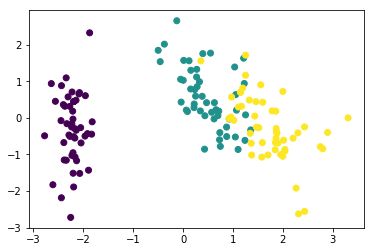

In [23]:
# 加载库
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt 
import scipy 

## 加载数据
data=load_iris()
x=data['data']
y=data['target']

#数据标准化,经验告诉我们，如果数据中所有的列尺度都一致，度量单位都相同，就没有必要进行缩放
x_d=scale(x,with_mean=True,with_std=True,axis=0)

#计算相关矩阵
x_c=np.corrcoef(x_d.T)

#从相关矩阵中找到特征值和特征向量
eig_val,r_eig_vec=scipy.linalg.eig(x_c)
print("Eig_Value is ",eig_val)
print("Eigen vectors are:\n",r_eig_vec)

#选择最前两个特征向量
w=r_eig_vec[:,0:2]

# 用合适的特征向量将原来的4维的数据集降为二维
x_rd=x_d.dot(w)#dot表示矩阵乘法，表示将原来的标准化矩阵*选择的特征向量

#画出新的二维散点图
plt.scatter(x_rd[:,0],x_rd[:,1],c=y)

### 主成分选择标准
1. 特征值标准：特征值为1，这意味着这个成分可以解释一个变量的变化价值。依照这个标准，一个成分硬广告至少解释一个变量的变化价值。我们必须采用值大于或等于1的特征值，你也可以根据数据集来设置这个阈值。在一个维度非常高的数据集中，如果一个成分只能够解释一个变量，那是远远不够的
2. 变化的比例评判标准。下面代码的运行结果表示了每个特征值和特征向量所能够解释的信息的百分比

In [26]:
print( "Component, Eigen Value, % of Variance, Cummulative %")
cum_per = 0
per_var = 0
for i,e_val in enumerate(eig_val):
    per_var = round((e_val / len(eig_val)),3)
    cum_per+=per_var
    print(('%d, %0.2f, %0.2f, %0.2f')%(i+1, e_val, per_var*100,cum_per*100))

Component, Eigen Value, % of Variance, Cummulative %
1, 2.91, 72.80, 72.80
2, 0.92, 23.00, 95.80
3, 0.15, 3.70, 99.50
4, 0.02, 0.50, 100.00


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


### PCA的缺陷
1. PCA的一个缺点是运算代价高昂。还有一点就是关于numpy里的corrcoef函数，这个函数在它的计算过程中里的内置进行数据标准化过程。
2. PCA的另一个缺陷就是假定数据所有变化的主要方向都是直线，这对于大部分真实场景的数据集来说都是无法满足的

**PCA在什么时候有效？**

要求输入的数据集必须要有相关联的列，这样才能有效使用PCA，若是输入的变量间没有相关性，PCA起不到任何作用

## 核PCA
这一节所讨论的核PCA能够**帮助我们解决那些变化不是线性的数据集降维**。在核PCA过程里，所有的数据点都会被核函数所应用，这将把所有的数据转换到核空间上，然后在这个核空间上应用普通的PCA过程

Text(0,0.5,'$x_2$')

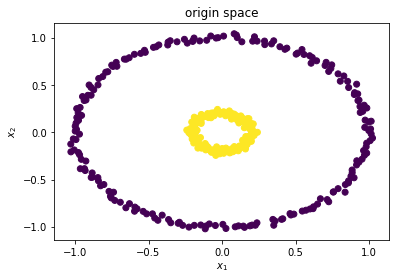

In [27]:
#加载库
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA,KernelPCA

#创建变化非线性的数据集
np.random.seed(0)
x,y=make_circles(n_samples=400,factor=0.2,noise=0.02)

# 为生成的数据集绘制图形
plt.title("origin space")
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

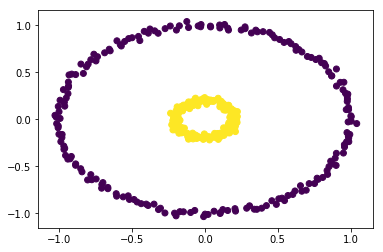

In [28]:
#尝试使用普通的PCA处理这个数据集
pca=PCA(n_components=2)
pca.fit(x)
x_pca=pca.transform(x)

#绘制出图形
plt.scatter(x_pca[:,0],x_pca[:,1],c=y)

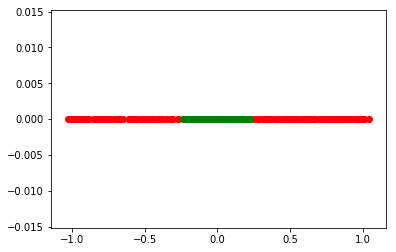

In [30]:
# 应用普通PCA，绘制出一个主成分
class1_index=np.where(y==0)[0]
class2_index=np.where(y==1)[0]

plt.scatter(x_pca[class1_index,0],np.zeros(len(class1_index)),color='r')
plt.scatter(x_pca[class2_index,0],np.zeros(len(class2_index)),color='g')

kernel的选项: "linear" | "poly" | "rbf" | "sigmoid" | "cosine" | "precomputed"
    Kernel. Default="linear".

gamma的含义: float, default=1/n_features
    Kernel coefficient for rbf, poly and sigmoid kernels. Ignored by other
    kernels.

Text(0,0.5,'$x_2$')

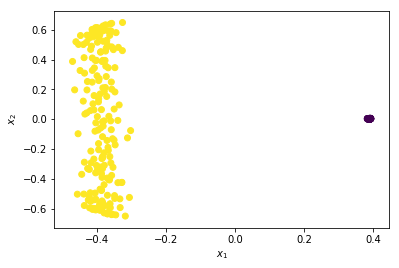

In [32]:
#使用核PCA
kpca=KernelPCA(kernel='rbf',gamma=10)
kpca.fit(x)
x_kpca=kpca.transform(x)

plt.scatter(x_kpca[:,0],x_kpca[:,1],c=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

## 使用奇异值分解抽取矩阵
奇异值分解(SVD)是另一种矩阵分解技术，他可以解决维度问题带来的麻烦，可以用较低的维数找到原始数据的最佳近似，和PCA不同，SVD直接作用于原始数据矩阵。

SVD把一个m*n的矩阵分解成三个矩阵的乘积：$$A=U*S*V^T$$

这里的U是一个m\*k的矩阵，V是n\*k矩阵，S是k\*k的矩阵，U的列被称为左奇异值向量，V的列则被称为右奇异值向量。矩阵S的对角线值被称为奇异值

S矩阵的对角元素是从大到小排列的。这些对角元素成为奇异值（Singular Value），他们对应了原始数据集矩阵Data的奇异值。奇异值和特征值是有关系的，这里的奇异值就是矩阵Data*（Data的转置）特征值的平方根。

因为矩阵的对角元素是从大到小排列的，在科学和工程中，一直存在这样一个普遍事实：在某个奇异值的数目（r个）之后，其他的奇异值都置为0。这就意味着数据集中仅有r个重要特征，而其余特征则都是噪声或者冗余特征

**因此在使用SVD之后，查看S矩阵，选择最大的几个进行降维即可**

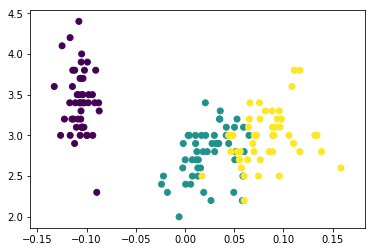

In [37]:
#加载库
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import scale
from scipy.linalg import svd

#加载数据集
data=load_iris()
x=data['data']
y=data['target']

#接着根据他的平均值进行数据缩放
x_d=scale(x,with_mean=True,with_std=True,axis=0)

# 用SVD技术分解矩阵
U,S,V=svd(x_d,full_matrices=False)

#选择最前的两个奇异值来近似原始的矩阵
x_t=U[:,:2]

#最后用降维的成分来绘制出数据集的图形
plt.scatter(x_t[:,0],x[:,1],c=y)

SVD是一种双模因子分析，古城是从一个具有两类试题的任意矩阵开始的，这和之前的PCA采用一个相关矩阵作为输入是不一样的，PCA是一种单模因子分析方法，因为它的输入方阵里的行和列是相同的实体。

**在文本挖掘中，输入一般被表示称为词-文档矩阵（TDM）**,在TDM中，行对应词，而列对应于文档，单元格实体填充的是词频或者TFIDF分数，因此这个是一个两类实体的矩形阵：词和文档分别由行和列代表

**SVD常常被用在文本挖掘应用中，用来发现词和文档，文档与文档以及词与词之间隐藏的关联**

将SVD应用于一个词-文档矩阵中，我们可以将它转为一个新的语义空间，在此空间中，一些未在同一文档中共现的词之间的距离可以十分接近。SVD的目标是找到一条有效的路径，来给词和文档的关联关系建模。应用SVD之后，每个文档和词都可以用因子值构成的向量来表示。我们可以将值很低的成分忽略掉，从而避免数据集中的噪音干扰。

**这种方法的一个分支对于文档查找或检索建立索引具有良好的适应性，它不再为原始的词建立反向索引，而是为输出的LSA（潜在语义分析）建立索引。这样就避免了同义词和一词多义的困扰。**

## 用随机映射给数据降维
随机映射是一种高效的降维方法，速度比前面两种都快。随机映射是Johnson-Linden Strauss定理的推论。根据这个定理，从高维到低维的欧几里得空间是存在的，这样点到点的距离被保持在一个$\varepsilon$方差内，因此，**随机映射的目的就是保持数据中的任意两点之间的距离，同时降低数据的维度**

假定在任意欧几里得空间里给定一个n维的数据，根据定理，我们可以将它映射称为一个K维的欧几里得空间，这样所有点之间的距离被保持在$(1-\varepsilon)$和$(1+\varepsilon)$的乘法因子之间

(595, 16115) (595, 1000)


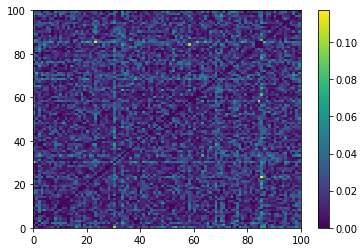

In [50]:
#加载库
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import euclidean_distances
from sklearn.random_projection import GaussianRandomProjection
import matplotlib.pyplot as plt 
import numpy as np

#加载数据集
data=fetch_20newsgroups(categories=['sci.crypt'])

#创建词文档矩阵，词频作为值
vec=TfidfVectorizer(use_idf=False)
vec_f=vec.fit_transform(data['data'])

##执行映射，将维度降到1000
gasuss_project=GaussianRandomProjection(n_components=1000)
gasuss_project.fit(vec_f)

#将原始数据转换到新的空间
vec_new=gasuss_project.transform(vec_f)

#打印出转换后的向量形状
print(vec_f.shape,vec_new.shape)

#为了验证转换过程中是否保持了距离，我们计算新旧两点间的距离
org_dist=euclidean_distances(vec_f)
red_dist=euclidean_distances(vec_new)

diff_dist=abs(org_dist-red_dist)

#绘图
plt.pcolor(diff_dist[0:100,0:100])
plt.colorbar()

## 使用NMF分解特征矩阵
前面主要介绍了一些为数据降维而采用的矩阵分解技术，而NMF是从协同过滤的角度出发的，虽然降维是我们的追求，不过采用协同过滤算法的非负矩阵分解常常被用在推荐系统中。

假定我们的输入矩阵A是m\*n维度的，NMF将它分解称为两个矩阵$A_dash$和H，$$A=A_dash*H$$

假定我们要将矩阵A的维度降为d，也就是将m\*n矩阵分解为m\*d，其中d远远小于n。

矩阵$A_dash$是m\*d的，矩阵H是d\*m，NMF把它转换为一个优化问题，即最小化以下函数：$$|A-A_{dash}*H|^2$$

User_id=1,comp1_score=2.13,comp2_score=0.00
User_id=2,comp1_score=1.91,comp2_score=0.00
User_id=3,comp1_score=0.76,comp2_score=2.05
User_id=4,comp1_score=1.94,comp2_score=0.44
User_id=5,comp1_score=0.29,comp2_score=2.35
User_id=6,comp1_score=1.39,comp2_score=1.30
User_id=7,comp1_score=0.99,comp2_score=2.02
User_id=8,comp1_score=2.01,comp2_score=0.41
User_id=9,comp1_score=0.80,comp2_score=1.78
User_id=10,comp1_score=1.74,comp2_score=0.58


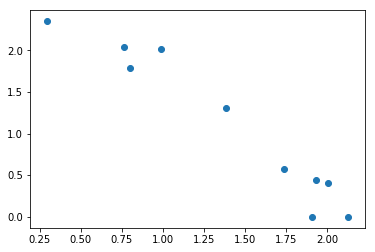

In [53]:
# 加载库
import numpy as np
from collections import defaultdict
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

# 加载评分矩阵
ratings = [
[5.0,	5.0,	4.5,	4.5,	5.0,	3.0,	2.0,	2.0,	0.0,	0.0],
[4.2,	4.7,	5.0,	3.7,	3.5,	0.0,	2.7,	2.0,	1.9,	0.0],
[2.5,	0.0,	3.3,	3.4,	2.2,	4.6,	4.0,	4.7,	4.2,	3.6],
[3.8,	4.1,	4.6,	4.5,	4.7,	2.2,	3.5,	3.0,	2.2,	0.0],
[2.1,	2.6,	0.0,	2.1,	0.0,	3.8,	4.8,	4.1,	4.3,	4.7],
[4.7,	4.5,	0.0,	4.4,	4.1,	3.5,	3.1,	3.4,	3.1,	2.5],
[2.8,	2.4,	2.1,	3.3,	3.4,	3.8,	4.4,	4.9,	4.0,	4.3],
[4.5,	4.7,	4.7,	4.5,	4.9,	0.0,	2.9,	2.9,	2.5,	2.1],
[0.0,	3.3,	2.9,	3.6,	3.1,	4.0,	4.2,	0.0,	4.5,	4.6],
[4.1,	3.6,	3.7,	4.6,	4.0,	2.6,	1.9,	3.0,	3.6,	0.0]
]

movie_dict = {
1:"Star Wars",
2:"Matrix",
3:"Inception",
4:"Harry Potter",
5:"The hobbit",
6:"Guns of Navarone",
7:"Saving Private Ryan",
8:"Enemy at the gates",
9:"Where eagles dare",
10:"Great Escape"
}

A=np.asmatrix(ratings,dtype=float)

## 对矩阵进行NMF转换
nmf=NMF(n_components=2,random_state=1)
A_dash=nmf.fit_transform(A)

#检查降维的矩阵
for i in range(A_dash.shape[0]):
    print("User_id=%d,comp1_score=%0.2f,comp2_score=%0.2f" %(i+1,A_dash[i][0],A_dash[i][1]))
    
# 绘图
plt.scatter(A_dash[:,0],A_dash[:,1])

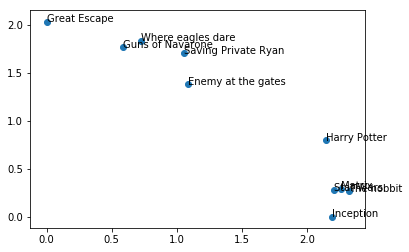

In [56]:
# 检查成分矩阵F
F=nmf.components_
plt.scatter(F[0,:],F[1,:])
for i in range(F[0,:].shape[0]):
    plt.annotate(movie_dict[i+1],(F[0,:][i],F[1,:][i]))

# 数据挖掘
## 使用距离度量
在数学层面上，一系列的点定义了一个空间，一个空间的里的距离度量被定义为函数d(x,y），它把空间里的x和y两个点作为参数，返回一个实数作为输出。这个距离函数作为输出的实数，需要满足以下几点规则：
1. 距离函数的输出必须是非负的，d(x,y)>=0
2. 仅当x=y时，函数的输出为0
3. 距离是对称的，即d(x,y)=d(y,x)
4. 距离应当遵循三角不等式，即d(x,y)<=d(x,z)+d(z,y)

### 欧式距离-euclidean_distance
欧式距离的常见公式为$$d([x_1,x_2...,x_n][y_1,y_2...,y_n])=\sqrt{\sum_{i=1}^{n}{x_i-y_i}^2}$$

In [6]:
import numpy as np
def euclidean_distance(x,y):
    if len(x)==len(y):
        return np.sqrt(np.sum(np.power(x-y,2)))
    else:
        print("请保证x,y长度相等")
        return None

In [3]:
x=np.array([1,2,4])
y=np.array([1,3,5])
euclidean_distance(x,y)

1.4142135623730951

### Lr-Norm距离度量
$$d([x_1,x_2...,x_n][y_1,y_2...,y_n)=(\sum_{i=1}^{n}{|x_i-y_i|^r})^{1/r}$$

In [5]:
import numpy as np
def Lr_norm_distance(x,y,power):
    if len(x)==len(y):
        return np.power(np.sum(np.power(x-y,power)),1/(1.0*power))
    else:
        print("请保证x,y长度相等")
        return None

In [15]:
x=np.array([1,2,4])
y=np.array([1,3,5])
Lr_norm_distance(x,y,8)

1.0905077326652577

### 余弦距离-cosine_distance
余弦距离返回两个向量之间夹角的余弦值。输入向量间角度的余弦值是两个向量点积与向量欧式距离乘积的比值


In [19]:
def cosine_distance(x,y):
    if len(x)==len(y):
        return np.dot(x,y)/(np.sqrt(np.sum(np.power(x,2)))*np.sqrt(np.sum(np.power(y,2))))
    else :
        print("请确保x,y长度相等")

In [20]:
cosine_distance(x,y)

0.9959100033104787

### Jaccard距离
之前涉及的是实数构成的向量，现在我们换成集合。**给定输入向量的集合，它们交集和并集大小的比值通常被称为Jaccard系数。1减去这个系数，得到的就是Jaccard距离**$$Jaccard\_distance=1-\frac{len(intersection(x,y)}{len(Union(x,y))}$$

In [21]:
def jaccard_distance(x,y):
    x=set(x)
    y=set(y)
    return 1-(len(x.intersection(y))/len(x.union(y)))

In [22]:
jaccard_distance(x,y)

0.8

### Hamming距离
Hamming距离是两个向量间不同的位的数量

In [23]:
def hamming_distance(x,y):
    diff=0
    for char1,char2 in zip(x,y):
        if char1 == char2:
            diff+=1
    return diff

In [24]:
hamming_distance(x,y)

1

## 核方法
一般而言，线性模型可以用一条直线或者一个超平面将数据分割开，是比较容易解释和理解的。数据若是非线性的话，就无法使用线性模型，但是数据能被转换成线性相关性的空间，则可以使用线性模型。然后满足上述条件需要进行高昂代价的数学运算，幸亏核函数给了我们一条便捷之道。

核函数是一种相似度函数，他需要两个输入参数，这两个输入之间的相似度即核函数的输出结果。**核函数K的正式定义是一个相似度函数，k(x1,x2)表示x1与x2之间的相似度**

核函数类型很多，取决于数据特征和算法的需要，我们需要做的就是选择合适的核

In [27]:
import numpy as np
x=np.array([1,2,5])
y=np.array([2,3,4])

#定义映射函数
def mapping_function(x):
    output_list  =[]
    for i in range(len(x)):
        output_list.append(x[i]*x[i])
    
    output_list.append(x[0]*x[1])
    output_list.append(x[0]*x[2])
    output_list.append(x[1]*x[0])
    output_list.append(x[1]*x[2])
    output_list.append(x[2]*x[1])
    output_list.append(x[2]*x[0])
    return np.array(output_list)
# Apply the mapping function
tranf_x = mapping_function(x)
tranf_y = mapping_function(y)
# Print the output
print(tranf_x)
print (np.dot(tranf_x,tranf_y))

# Print the equivalent kernel functions
# transformation output.
output = np.power((np.dot(x,y)),2)
print(output)

[ 1  4 25  2  5  2 10 10  5]
784
784


## 使用k-means进行数据聚类
k-means算法，是一种搜寻中心的无监督算法，是一个种迭代的不确定方法。k-means需要指定簇的数量k来作为算法的输入参数，至于如何选择k的值，目前没有什么好的方法，只能通过多次运算比较结果来确定。

对于任何一种聚类算法来说，输出结果的质量取决于簇内的内聚和簇间的分散：在同一个簇里的点相互靠近，而不同簇里的点相互远离。K-means产生的每个簇都可以用以下的指标进行评估：
1. 簇的位置：簇中心的坐标。k-means初始化的时候随机选择一个点作为中心点，然后每个步骤迭代找到一个新的中心，在这个心的中心附近的点都相似，并被划分到同一个组
2. 簇的半径：簇内的每个点到簇中心的距离的平均差
3. 簇的规模：簇内点的总数
4. 簇的密度：簇的规模和簇的半径的比值

在这里我们用轮廓系数来评价k-means的结果，它的值介于-1-1之间，负值说明簇的半径大于簇之间的距离，也就是说簇之间有重叠，这说明聚类效果很差；而值越大，越接近1，表示聚类的效果越好。

轮廓系数是定义在簇上的每一个点之上的。在每一个簇C里，x_i是点i到簇内其他点的距离的平均值。然后计算这个点i到其他簇D的所有点的距离的平均值，选择其中的最小值y_i $$S_i=\frac{y_i-x_i}{max(x_i,y_i}$$

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0
 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[3 0 1 3 3 1 3 3 1 1 1 3 3 3 3 1 3 0 3 1 1 3 3 1 3 3 3 1 1 3 1 1 1 1 3 3 1
 3 1 3 3 3 3 1 3 1 0 1 3 3 3 3 1 3 1 1 3 1 0 1 1 1 3 3 1 3 1 1 3 3 1 3 1 1
 1 1 1 1 3 3 1 3 1 1 3 3 3 3 3 3 3 1

Text(0.5,1,'cluster quality')

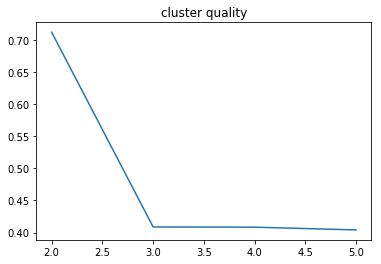

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

#生成随机数
def get_random_data():
    x_1 = np.random.normal(loc=0.2,scale=0.2,size=(100,100))
    x_2 = np.random.normal(loc=0.9,scale=0.1,size=(100,100))
    x = np.r_[x_1,x_2]
    return x

# 定义生成簇函数
def form_clusters(x,k):
    model=KMeans(n_clusters=k,init="random")
    model.fit(x)
    labels=model.labels_
    print(labels)
    sh_scores=silhouette_score(x,labels)
    return sh_scores

#给定不同的K值调用上述函数
x=get_random_data()
sh_scores=[]
for i in range(1,5):
    sh_scores.append(form_clusters(x,i+1))

#绘制不同簇时的轮廓系数图像
no_clusters=[i+1 for i in range (1,5)]

plt.plot(no_clusters,sh_scores)
plt.title("cluster quality")

**应用k-means要注意，不能用它来对数据进行分类。如果要分类，要使用k中心点算法，它是找出一点，使得它和簇内的所有点的平均距离最小**

## 学习向量量化
学习向量量化(learning vector quantization)可以用来执行分类任务，使用这种技术时，很难在目标变量和预测变量之间做出合适的判断。和其他方法不同，它很难搞清楚反应变量y与预测期x之间存在的联系，因此在现实很多的场景中，是作为一个黑箱方法来加以应用的。

LVQ的主要步骤如下：
1. 为数据集中的每个类别选择K个初始的原型向量，如果是一个二分类问题，并且分类中有两个原型向量，那么我们就需要设置4个初始的原型向量，他们是从输入的数据集中随机选择的。
2. 接着进行循环，知道$\varepsilon$值变为0或者预设设定的阈值。
3. 每次循环中我们都要采样一个输入点，采用欧式距离找出离它最近的原型向量，然后按下面的操作更新最邻近点的原型向量
    - 如果它的原型向量的类别标签跟输入数据点的相同，则在原型向量上增加原型向量和数据点的差异
    - 如果类别标签不一样，则在原型向量上减去原型向量和数据点的差异

In [48]:
#加载库
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import euclidean_distances

#加载数据
data=load_iris()
x=data['data']
y=data['target']

# 对数据进行缩放
maxmin=MinMaxScaler()
x=maxmin.fit_transform(x)

#LVQ参数
R=2
n_classes=3
epsilon=.9
epsion_dec_factor=0.01

## 定义一个类保存原型向量
class prototype(object):
    def __init__(self,class_id,p_vector,eplsilon):
        self.class_id=class_id
        self.p_vector=p_vector
        self.eplsilon=eplsilon
    def update(self,u_vector,increment=True):
        if increment:
            self.p_vector=self.p_vector+self.eplsilon*(u_vector-self.p_vector)
        else:
            self.p_vector=self.p_vector-self.eplsilon*(u_vector-self.p_vector)
            
def find_closest(in_vector,proto_vectors):
    closest=[]
    closest_distance=9999
    in_vector=in_vector.reshape(4,-1).T
    for p_v in proto_vectors:
        p_vs=p_v.p_vector.reshape(4,-1).T
      
        distance=euclidean_distances(in_vector,p_vs)
        if distance < closest_distance:
            closest_distance=distance
            closest=p_v
    return closest
def find_closest_Id(test_vector,p_vectors):
    return find_closest(test_vector,p_vectors).class_id

#选择初始化的k*原型向量类别数,为每个类别选取俩个原型向量
p_vectors = []
for i in range(n_classes):
    # Select a class
    y_subset = np.where(y == i)
    # Select tuples for choosen class
    x_subset  = x[y_subset]
    # Get R random indices between 0 and 50
    samples = np.random.randint(0,len(x_subset),R)
    # Select p_vectors
    for sample in samples:
        s = x_subset[sample]
        p = prototype(i,s,epsilon)
        p_vectors.append(p)

#利用有的数据点，执行循环调整原型向量，对新的点进行分类/聚类
while epsilon>=0.01:
    #随机采样一个训练实例
    rnd_i=np.random.randint(0,149)
    x_test=x[rnd_i]
    target_y=y[rnd_i]
    
    #为下一次循环减少epsilon
    epsilon=epsilon-epsion_dec_factor
    
    #查找与测试样本最相近的原型
    closest_prototype=find_closest(x_test,p_vectors)
    
    #更新最相近的原型向量
    if target_y== closest_prototype.class_id:
        closest_prototype.update(x_test)
    else:
        closest_prototype.update(x_test,False)
    closest_prototype.eplsilon=epsilon
    
print("class id \t Final Prototype Vector\n")
for p_vector in p_vectors:
    print(p_vector.class_id,'\t',p_vector.p_vector)

class id 	 Final Prototype Vector

0 	 [0.08606975 0.51539311 0.03503506 0.04008657]
0 	 [0.28283579 0.7339293  0.07306485 0.08517138]
1 	 [0.46952205 0.2284319  0.49923762 0.4210256 ]
1 	 [0.80285622 0.54599496 0.46435806 0.28608652]
2 	 [0.79619667 0.43380497 0.83120244 0.82730621]
2 	 [0.53406878 0.40503651 0.72480086 0.92487993]


In [49]:
#生成预测报告
predicted_y = [find_class_id(instance,p_vectors) for instance in x ]

from sklearn.metrics import classification_report
print(classification_report(y,predicted_y,target_names=['Iris-Setosa','Iris-Versicolour', 'Iris-Virginica']))

                  precision    recall  f1-score   support

     Iris-Setosa       1.00      1.00      1.00        50
Iris-Versicolour       0.92      0.88      0.90        50
  Iris-Virginica       0.88      0.92      0.90        50

     avg / total       0.93      0.93      0.93       150



## 在单变量数据中找出异常点
数据集中远离大部分数据点的点就是异常点。数据科学的应用非常重视这些异常点，如算法受到它们的影响，可能会产生错误的结果或者推论。处理它们非常重要，选择合适的算法也非常重要。

在单变量数据中检测异常点主要有以下几种方法：
- 绝对中位差
- 平均值加或减3倍标准差

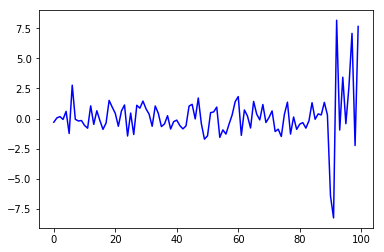

In [55]:
import numpy as np
import matplotlib.pyplot as plt

#产生正常数据
normal_data=np.random.randn(90,1)

#产生异常点
outlier_data=np.random.uniform(low=-9,high=9,size=(10,1))

#结合数据
total_data=np.r_[normal_data,outlier_data]

plt.plot(range(len(total_data)),total_data,'b')

**什么是绝对中位差**

绝对中位差实际求法是用原数据减去中位数后得到的新数据的绝对值的中位数。$$MAD=median_i|X_i-median(X)|$$


但绝对中位差常用来估计标准差，估计标准差=1.4826*绝对中位差。R语言中返回的是估计的标准差

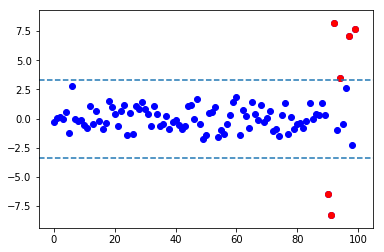

In [64]:
#用中位差标注异常点
median=np.median(total_data)
mad=1.4826*np.median(np.abs(total_data-median))

## 确定上下界限
low_limit=median-3*mad
high_limit=median+3*mad
outlier=[]
outlier_index=[]
for i in range(len(total_data)):
    if total_data[i]<low_limit or total_data[i]>high_limit:
        outlier.append(total_data[i])
        outlier_index.append(i)
plt.scatter(range(len(total_data)),total_data,c='b')
plt.scatter(outlier_index,outlier,c='r')
plt.axhline(low_limit,ls='--')
plt.axhline(high_limit,ls='--')

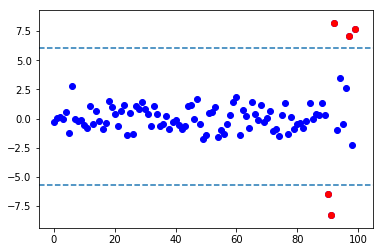

In [71]:
# 3倍标准差
mean=np.mean(total_data)
std=np.std(total_data)
low_limit=mean-3*std
high_limit=mean+3*std

outliers=[]
outlier_index=[]
for i in range(len(total_data)):
    if total_data[i]>high_limit or total_data[i]<low_limit:
        outliers.append(total_data[i])
        outlier_index.append(i)
plt.scatter(range(len(total_data)),total_data,c='b')
plt.scatter(outlier_index,outliers,c='r')
plt.axhline(low_limit,ls='--')
plt.axhline(high_limit,ls='--')

## 使用局部异常因子发现异常点
局部异常因子也是一种异常检测算法，它对数据实例的局部密度和邻居进行比较，判断这些数据是否属于相似的密度区域，**它适合那些簇个数未知，簇的密度和大小各不相同的数据中筛选异常点**，这种算法从K最近邻算法（KNN）启发而来

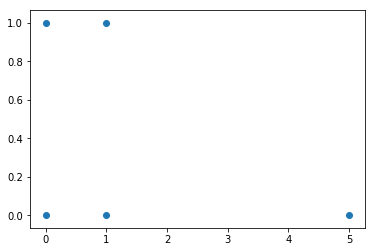

In [86]:
#制造异常点
from collections import defaultdict
import numpy as np

instances = np.matrix([[0,0],[0,1],[1,1],[1,0],[5,0]])

import numpy as np
import matplotlib.pyplot as plt

x = np.squeeze(np.asarray(instances[:,0]))
y = np.squeeze(np.asarray(instances[:,1]))
plt.scatter(x,y)
plt.show()

In [87]:
##计算各点两两之间的距离
k=2
from sklearn.metrics import pairwise_distances
dist=pairwise_distances(instances,metric='manhattan')

# 计算K距离，使用heapq来获得k最近邻
# Calculate K distance
import heapq
k_distance = defaultdict(tuple)
# For each data point
for i in range(instances.shape[0]):
    # Get its distance to all the other points.
    # Convert array into list for convienience
    distances = dist[i].tolist()
    # Get the K nearest neighbours
    ksmallest = heapq.nsmallest(k+1,distances)[1:][k-1]
    # Get their indices
    ksmallest_idx = distances.index(ksmallest)
    # For each data point store the K th nearest neighbour and its distance
    k_distance[i]=(ksmallest,ksmallest_idx)


In [90]:
def all_indices(value, inlist):
    out_indices = []
    idx = -1
    while True:
        try:
            idx = inlist.index(value, idx+1)#idx+1表示查找的起点位置，这样就可以避免每次查找的时候都是第一个匹配
            out_indices.append(idx)
        except ValueError:
            break
    return out_indices

# Calculate K distance neighbourhood
import heapq
k_distance_neig = defaultdict(list)
# For each data point
for i in range(instances.shape[0]):
    # Get the points distances to its neighbours
    distances = dist[i].tolist()
    print( "k distance neighbourhood",i)
    print (distances)
    # Get the 1 to K nearest neighbours
    ksmallest = heapq.nsmallest(k+1,distances)[1:]
    print (ksmallest)
    ksmallest_set = set(ksmallest)
    print (ksmallest_set)
    ksmallest_idx = []
    # Get the indices of the K smallest elements
    for x in ksmallest_set:
            ksmallest_idx.append(all_indices(x,distances))
    # Change a list of list to list
    ksmallest_idx = [item for sublist in ksmallest_idx for item in sublist]
    # For each data pont store the K distance neighbourhood
    k_distance_neig[i].extend(zip(ksmallest,ksmallest_idx))

#计算可达距离和LRD
local_reach_density = defaultdict(float)
for i in range(instances.shape[0]):
    # LRDs numerator, number of K distance neighbourhood
    no_neighbours = len(k_distance_neig[i])
    denom_sum = 0
    # Reachability distance sum
    for neigh in k_distance_neig[i]:
        # maximum(K-Distance(P), Distance(P,Q))
        denom_sum+=max(k_distance[neigh[1]][0],neigh[0])
    local_reach_density[i] = no_neighbours/(1.0*denom_sum)

lof_list =[]
#Local Outlier Factor
for i in range(instances.shape[0]):
    lrd_sum = 0
    rdist_sum = 0
    for neigh in k_distance_neig[i]:
        lrd_sum+=local_reach_density[neigh[1]]
        rdist_sum+=max(k_distance[neigh[1]][0],neigh[0])
    lof_list.append((i,lrd_sum*rdist_sum))


k distance neighbourhood 0
[0.0, 1.0, 2.0, 1.0, 5.0]
[1.0, 1.0]
{1.0}
k distance neighbourhood 1
[1.0, 0.0, 1.0, 2.0, 6.0]
[1.0, 1.0]
{1.0}
k distance neighbourhood 2
[2.0, 1.0, 0.0, 1.0, 5.0]
[1.0, 1.0]
{1.0}
k distance neighbourhood 3
[1.0, 2.0, 1.0, 0.0, 4.0]
[1.0, 1.0]
{1.0}
k distance neighbourhood 4
[5.0, 6.0, 5.0, 4.0, 0.0]
[4.0, 5.0]
{4.0, 5.0}
